In [1]:
#hivemind.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#3 March 2018
#
#This illustrates how to play the hivemind game...

In [2]:
#generate small sample of bucket_yields
N_buckets = 4
lag = 1
N_turns = 7
SNR = 1.1                       #signal/noise ratio
rn_seed = 14
from hivemind import *
np.random.seed(seed=rn_seed)
actual_bucket_yields, best_bucket, lagged_bucket_yields, bucket_yield_mean, bucket_yield_sigma = \
    make_bucket_yields(N_buckets, N_turns, SNR, lag)

In [3]:
#print actual_bucket_yields & note that best_bucket=1 for bucket having highest actual_bucket_yields
for idx in range(N_turns):
    print 'actual_bucket_yields = ', actual_bucket_yields[idx], 'best_bucket = ', best_bucket[idx]

actual_bucket_yields =  [ 0.          0.00178665  0.00386053  0.0046712 ] best_bucket =  [ 0.  0.  0.  1.]
actual_bucket_yields =  [ 0.          0.00188588 -0.00121566  0.00595959] best_bucket =  [ 0.  0.  0.  1.]
actual_bucket_yields =  [ 0.          0.00330989  0.00276882  0.00506664] best_bucket =  [ 0.  0.  0.  1.]
actual_bucket_yields =  [ 0.          0.00263978  0.00278686  0.00781955] best_bucket =  [ 0.  0.  0.  1.]
actual_bucket_yields =  [ 0.          0.00284536  0.00261367 -0.0035996 ] best_bucket =  [ 0.  1.  0.  0.]
actual_bucket_yields =  [ 0.          0.00293365  0.00639174  0.01087772] best_bucket =  [ 0.  0.  0.  1.]
actual_bucket_yields =  [ 0.          0.00017922  0.00610507  0.0089685 ] best_bucket =  [ 0.  0.  0.  1.]


In [4]:
#print lagged_bucket_yields & note that lagged_bucket_yields is lagged by 1 record
for idx in range(N_turns):
    print 'lagged_bucket_yields = ', lagged_bucket_yields[idx], 'best_bucket = ', best_bucket[idx]

lagged_bucket_yields =  [ 0.          0.00017922  0.00610507  0.0089685 ] best_bucket =  [ 0.  0.  0.  1.]
lagged_bucket_yields =  [ 0.          0.00178665  0.00386053  0.0046712 ] best_bucket =  [ 0.  0.  0.  1.]
lagged_bucket_yields =  [ 0.          0.00188588 -0.00121566  0.00595959] best_bucket =  [ 0.  0.  0.  1.]
lagged_bucket_yields =  [ 0.          0.00330989  0.00276882  0.00506664] best_bucket =  [ 0.  0.  0.  1.]
lagged_bucket_yields =  [ 0.          0.00263978  0.00278686  0.00781955] best_bucket =  [ 0.  1.  0.  0.]
lagged_bucket_yields =  [ 0.          0.00284536  0.00261367 -0.0035996 ] best_bucket =  [ 0.  0.  0.  1.]
lagged_bucket_yields =  [ 0.          0.00293365  0.00639174  0.01087772] best_bucket =  [ 0.  0.  0.  1.]


In [5]:
#generate larger sample of bucket_yields
N_buckets = 60
lag = 1
N_turns = 100
rn_seed = 14
from hivemind import *
np.random.seed(seed=rn_seed)
actual_bucket_yields, best_bucket, lagged_bucket_yields, bucket_yield_mean, bucket_yield_sigma = \
    make_bucket_yields(N_buckets, N_turns, SNR, lag)

In [6]:
#prep matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

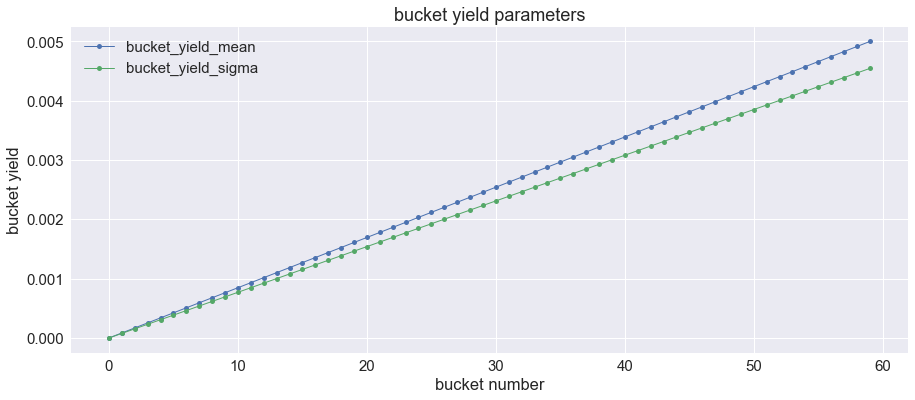

In [7]:
#plot loss vs training epoch...note that bucket_yield_mean has signal/noise=2
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = np.arange(N_buckets)
yp = bucket_yield_mean
ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label='bucket_yield_mean')
yp = bucket_yield_sigma
ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label='bucket_yield_sigma')
ax.set_title('bucket yield parameters')
ax.set_ylabel('bucket yield')
ax.set_xlabel('bucket number')
ax.legend()

In [8]:
#play single small game and compute net_values vs turn
strategy = 'high'
N_buckets = 6
lag = 1
N_turns = 100
actual_bucket_yields, _, lagged_bucket_yields, _, _ = make_bucket_yields(N_buckets, N_turns, SNR, lag)
net_values = compute_net_value(actual_bucket_yields, lagged_bucket_yields, strategy)
net_values.tail()

,yield0,yield1,yield2,yield3,yield4,yield5,net_value,prob0,prob1,prob2,prob3,prob4,prob5,compound_value,turn
95,0.0,0.000658,0.000416,0.005332,0.000629,0.013466,1.007048,0.0,0.0,0.0,0.0,0.5,0.5,1.526047,95
96,0.0,0.000548,0.002033,0.003201,0.005460,0.002210,1.003835,0.0,0.0,0.0,0.0,0.5,0.5,1.531900,96
97,0.0,0.000828,0.001642,0.004087,0.009017,0.001675,1.005346,0.0,0.0,0.0,0.0,0.5,0.5,1.540089,97
98,0.0,0.000556,0.003245,0.003457,0.000612,-0.000917,0.999847,0.0,0.0,0.0,0.0,0.5,0.5,1.539854,98
99,0.0,0.001904,-0.001126,0.001686,0.002027,0.002547,1.002287,0.0,0.0,0.0,0.0,0.5,0.5,1.543376,99


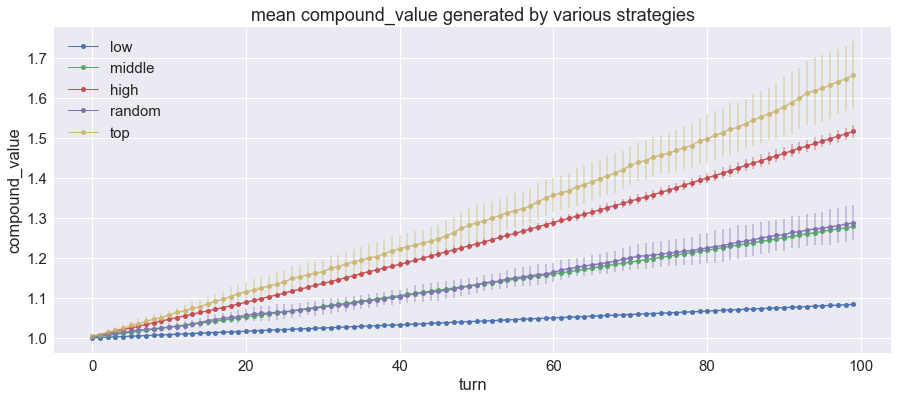

In [9]:
N_games = 10
N_buckets = 60
lag = 1
N_turns = 100
strategies = ['low', 'middle', 'high', 'random', 'top']
fig, ax = plt.subplots(1,1, figsize=(15, 6))
all_net_values = pd.DataFrame()
for strategy in strategies:
    for idx in range(N_games):
        actual_bucket_yields, _, lagged_bucket_yields, _, _ = make_bucket_yields(N_buckets, N_turns, SNR, lag)
        net_values = compute_net_value(actual_bucket_yields, lagged_bucket_yields, strategy, model=None)
        net_values['strategy'] = strategy
        all_net_values = all_net_values.append(net_values, ignore_index=True)
g = all_net_values.groupby(['strategy', 'turn'], as_index=False)['compound_value'].agg(['mean', 'std', 'count'])
for strategy in strategies:
    strategy_results = g.loc[strategy]
    xp = strategy_results.index
    yp = strategy_results['mean'].values
    yerr = strategy_results['std'].values
    p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label=strategy)
    p = ax.errorbar(xp, yp, yerr=yerr, alpha=0.4, color=p[0].get_color())
p = ax.set_title('mean compound_value generated by various strategies')
p = ax.set_ylabel('compound_value')
p = ax.set_xlabel('turn')
p = ax.legend()

In [10]:
#generate lots of test-train-validate data: lagged_bucket_yields and best_bucket
N_buckets = 60
lag = 1
N_turns = 100000
actual_bucket_yields, best_bucket, lagged_bucket_yields, _, _ = make_bucket_yields(N_buckets, N_turns, SNR, lag)

In [11]:
#test-train-validation split is 1:1:1
train_fraction = 0.333
x = lagged_bucket_yields
y = best_bucket
from sklearn.model_selection import train_test_split
x_train, x_test_validate, y_train, y_test_validate = train_test_split(x, y, train_size=train_fraction, 
    test_size=(1-train_fraction), random_state=rn_seed)
train_fraction = 0.5
x_test, x_validate, y_test, y_validate = \
    train_test_split(x_test_validate, y_test_validate, train_size=train_fraction, random_state=rn_seed)
print x.shape, y.shape
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape
print x_validate.shape, y_validate.shape

(100000, 60) (100000, 60)
(33300, 60) (33300, 60)
(33350, 60) (33350, 60)
(33350, 60) (33350, 60)


/Users/joe/miniconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
#build MLP classification model 
N_inputs = x.shape[1]
N_outputs = y.shape[1]
N_middle_layer = (N_inputs + N_outputs)/2
dropout_fraction = 0.25
model = mlp_classifier(N_inputs, N_middle_layer, N_outputs, dropout_fraction)
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
Total params: 7,320
Trainable params: 7,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
#train model to predict rewards
N_epochs = 10
batch_size = N_turns/100
dropout_fraction = 0.0
N_middle_layer = 0
print 'layers = ', N_inputs, N_middle_layer, N_outputs
print 'dropout_fraction = ', dropout_fraction
model = mlp_classifier(N_inputs, N_middle_layer, N_outputs, dropout_fraction)
fit_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=N_epochs, verbose=0, 
    validation_data=(x_validate, y_validate))

layers =  60 0 60
dropout_fraction =  0.0


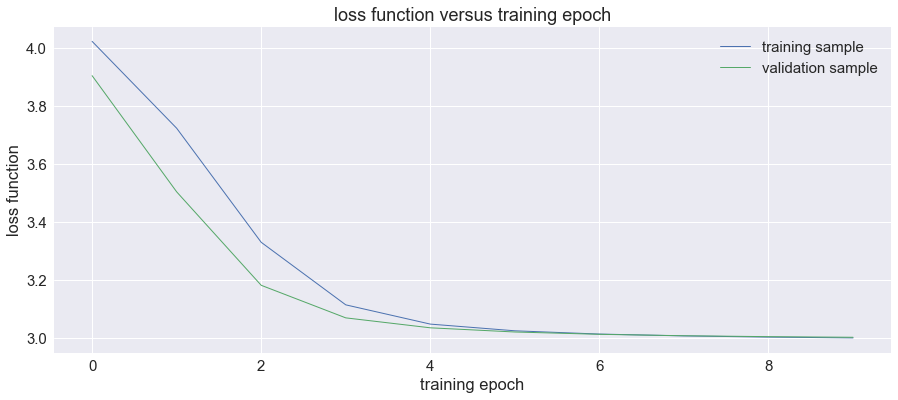

In [14]:
#plot loss vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['loss']
p = ax.plot(xp, yp, linewidth=1, label='training sample')
yp = fit_history.history['val_loss']
p = ax.plot(xp, yp, linewidth=1, label='validation sample')
p = ax.set_title('loss function versus training epoch')
p = ax.set_ylabel('loss function')
p = ax.set_xlabel('training epoch')
p = ax.legend()

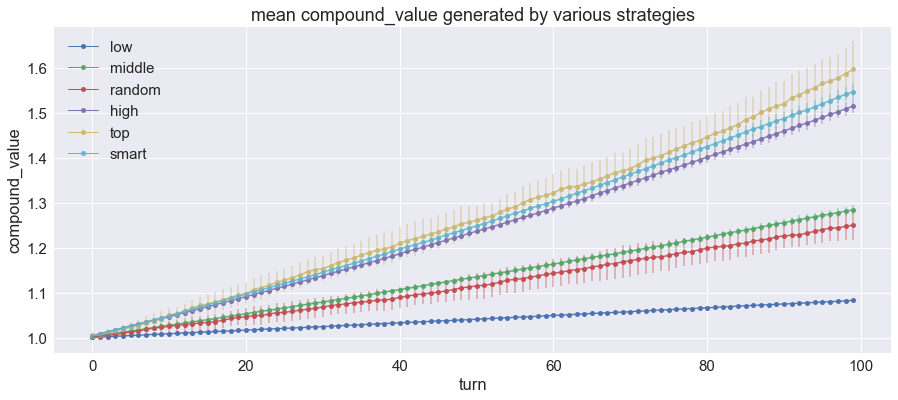

In [15]:
#play 10 short games using each strategy and plot their mean compound_value
N_games = 10
N_turns = 100
strategies = ['low', 'middle', 'random', 'high', 'top', 'smart']
fig, ax = plt.subplots(1,1, figsize=(15, 6))
all_net_values = pd.DataFrame()
for strategy in strategies:
    for idx in range(N_games):
        actual_bucket_yields, _, lagged_bucket_yields, _, _ = make_bucket_yields(N_buckets, N_turns, SNR, lag)
        net_values = compute_net_value(actual_bucket_yields, lagged_bucket_yields, strategy, model=model)
        net_values['strategy'] = strategy
        all_net_values = all_net_values.append(net_values, ignore_index=True)
g = all_net_values.groupby(['strategy', 'turn'], as_index=False)['compound_value'].agg(['mean', 'std', 'count'])
for strategy in strategies:
    strategy_results = g.loc[strategy]
    xp = strategy_results.index
    yp = strategy_results['mean'].values
    yerr = strategy_results['std'].values
    p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label=strategy)
    p = ax.errorbar(xp, yp, yerr=yerr, alpha=0.4, color=p[0].get_color())
p = ax.set_title('mean compound_value generated by various strategies')
p = ax.set_ylabel('compound_value')
p = ax.set_xlabel('turn')
p = ax.legend()

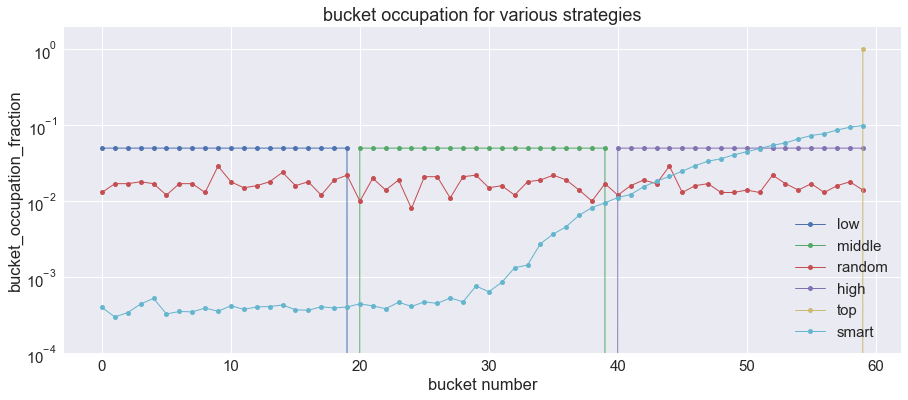

In [16]:
cols = ['strategy'] + [col for col in all_net_values.columns if ('prob' in col)]
df = all_net_values[cols]
avg = df.groupby('strategy').mean()
std = df.groupby('strategy').std()
count = df.groupby('strategy').count()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
for strategy in strategies:
    yp = avg[avg.index == strategy].values.flatten()
    yerr = std[avg.index == strategy].values.flatten()
    xp = np.arange(len(yp))
    p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label=strategy)
    #p = ax.errorbar(xp, yp, yerr=yerr, alpha=0.4, color=p[0].get_color())
p = ax.set_title('bucket occupation for various strategies')
p = ax.set_ylabel('bucket_occupation_fraction')
p = ax.set_xlabel('bucket number')
p = ax.set_ylim(1.0e-4, 2.0)
p = ax.set_yscale('log')
p = ax.legend()